Dataset loaded successfully.


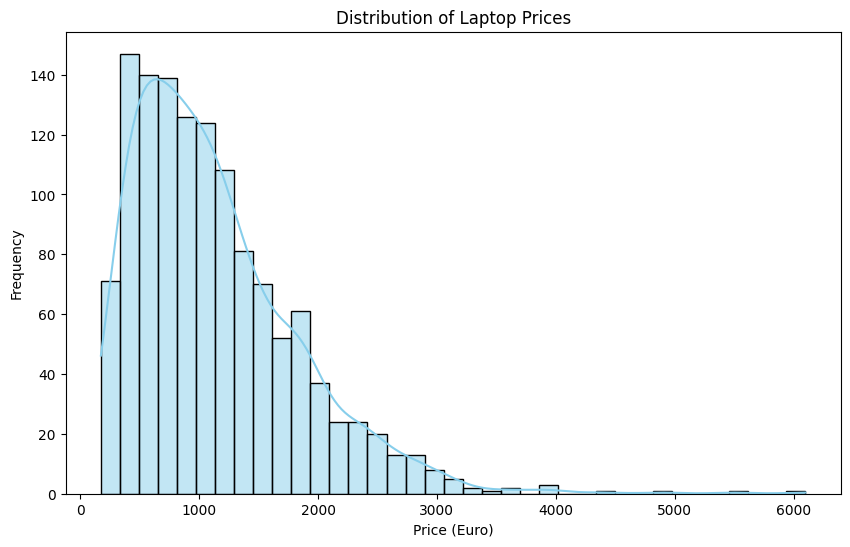


--- Average Laptop Price per Company ---
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

The company with the most expensive laptop on average is: Razer


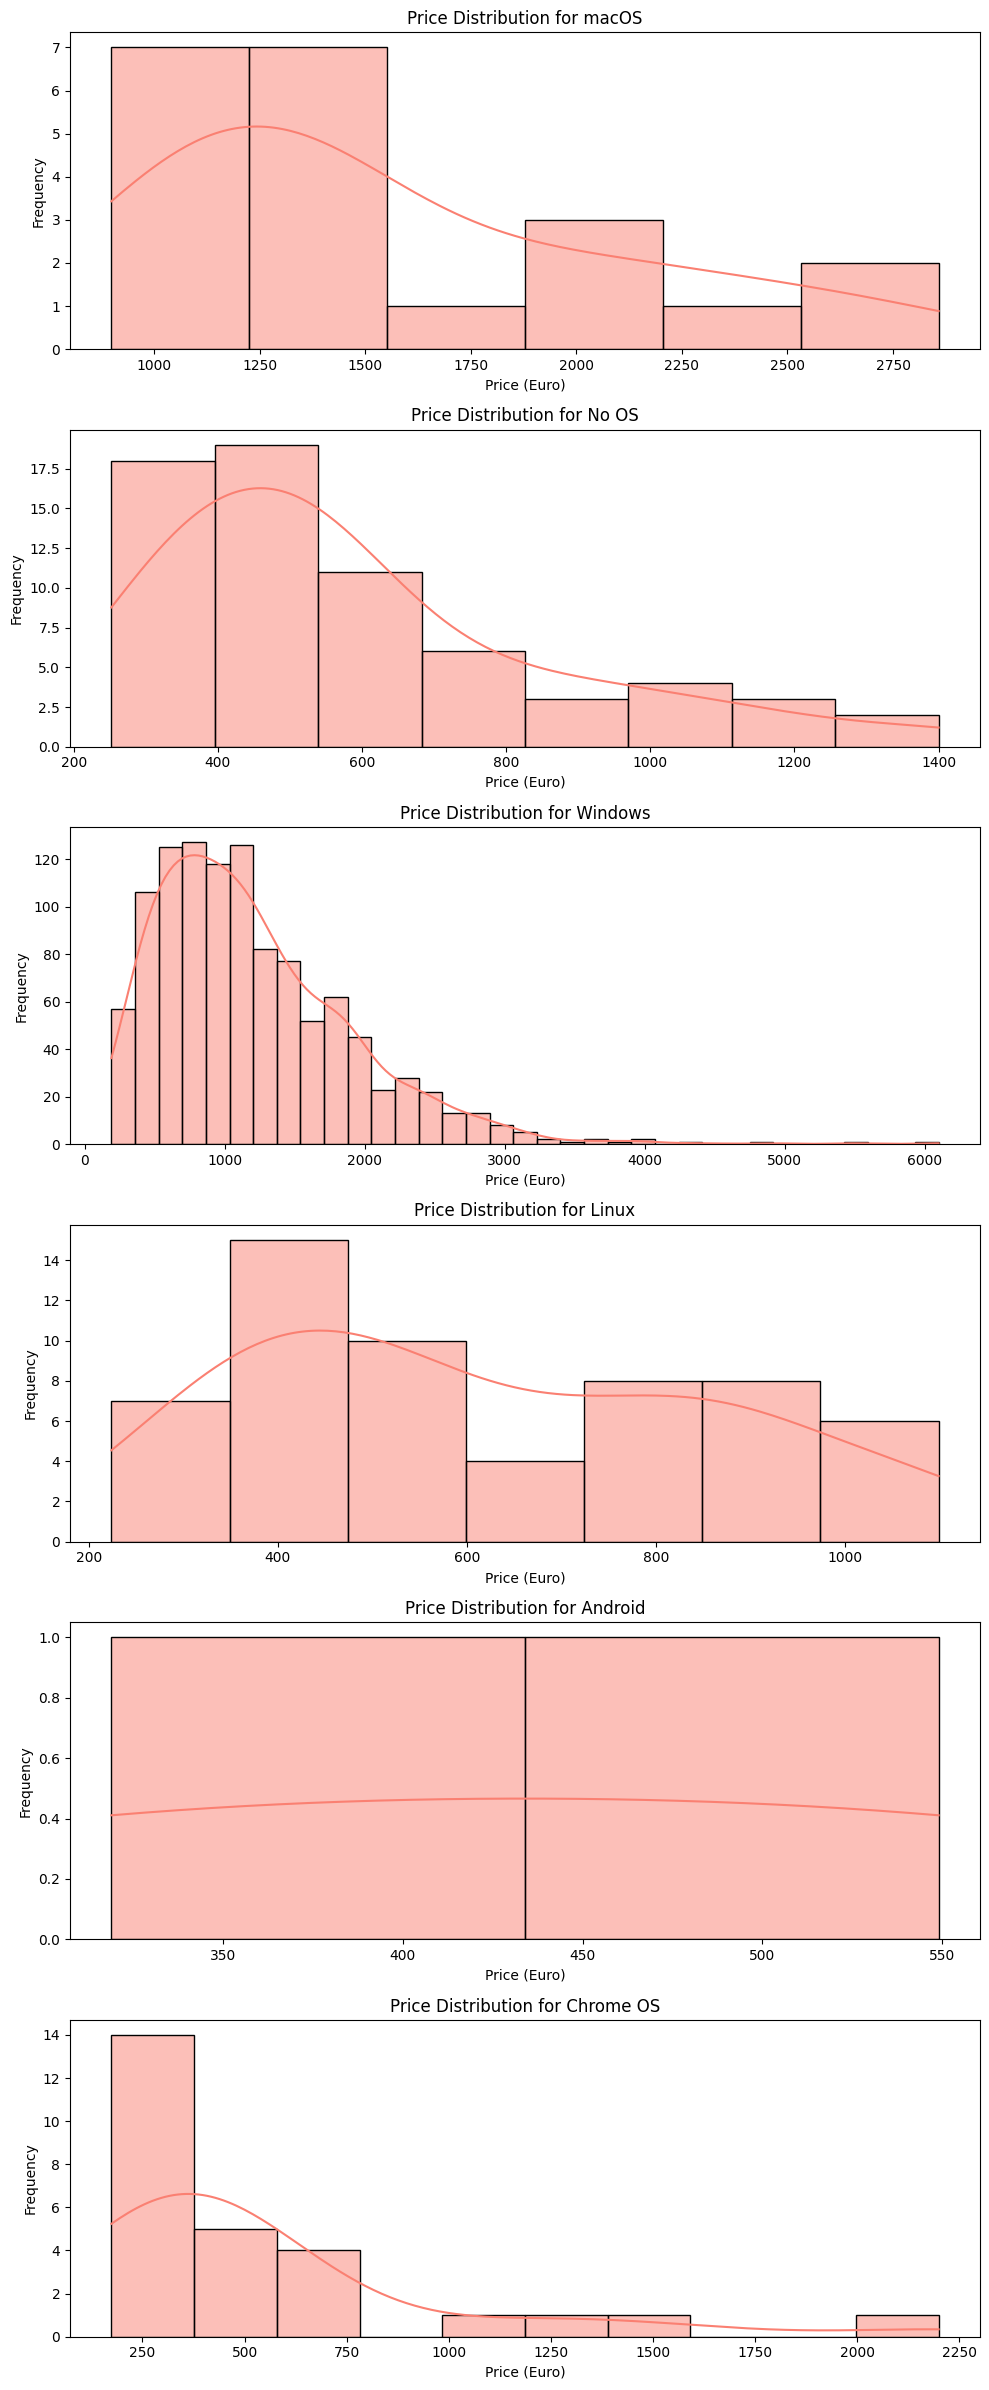

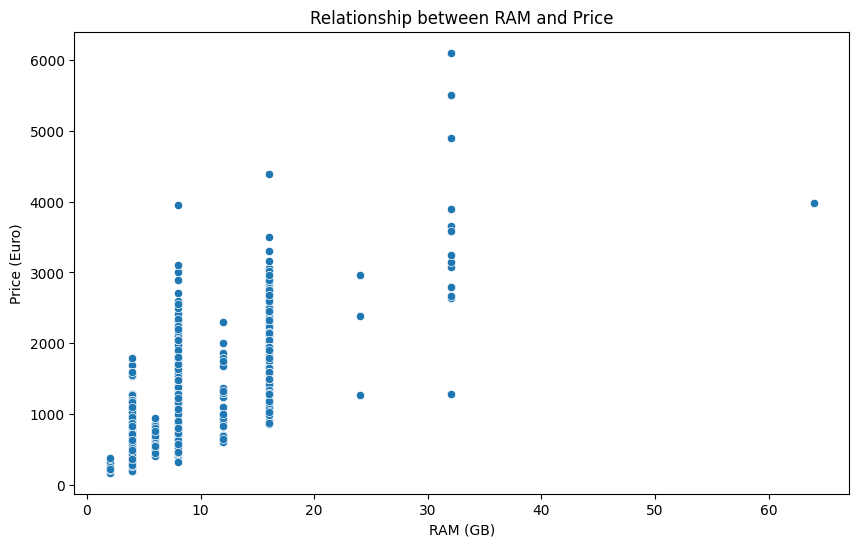

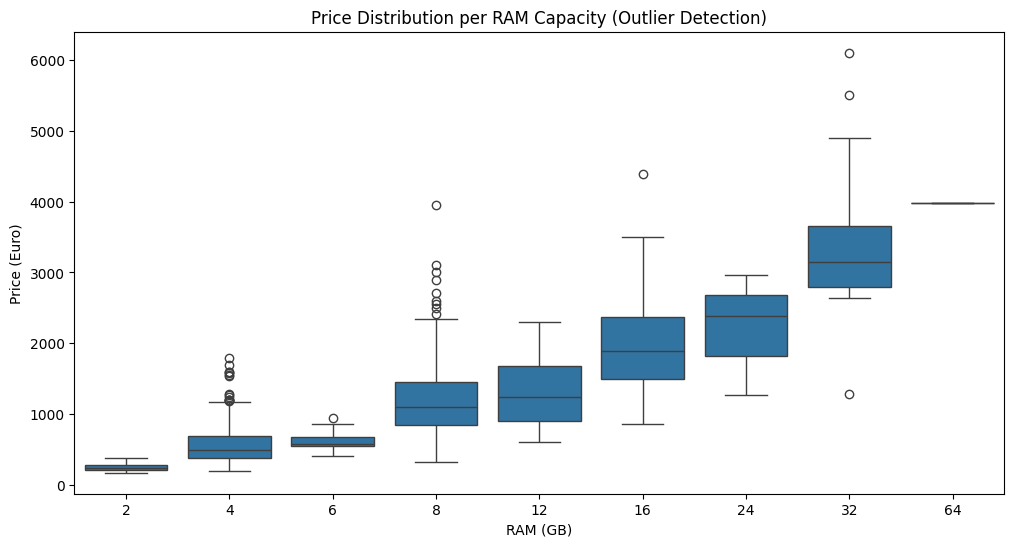


--- Storage Type Column Created (First 5 rows) ---
                Memory   Storage type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Import the dataset
try:
    df = pd.read_csv('laptop_price - dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Please make sure 'laptop_price - dataset.csv' is in the same folder.")

# 2. Plot the price of all laptops
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (Euro)'], kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.show()

# 3. Company Pricing Analysis
company_avg_price = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
print("\n--- Average Laptop Price per Company ---")
print(company_avg_price)
print(f"\nThe company with the most expensive laptop on average is: {company_avg_price.index[0]}")

# 4. Cleaning Operating Systems
def unify_opsys(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'Mac' in os or 'macOS' in os:
        return 'macOS'
    else:
        return os

df['OpSys_Cleaned'] = df['OpSys'].apply(unify_opsys)

# 5. Plot price distribution for each unique operating system
unique_os = df['OpSys_Cleaned'].unique()
fig, axes = plt.subplots(len(unique_os), 1, figsize=(10, 4 * len(unique_os)))

for i, os_name in enumerate(unique_os):
    sns.histplot(df[df['OpSys_Cleaned'] == os_name]['Price (Euro)'], ax=axes[i], kde=True, color='salmon')
    axes[i].set_title(f'Price Distribution for {os_name}')
    axes[i].set_xlabel('Price (Euro)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 6. RAM vs Price & Outlier Detection
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=df)
plt.title('Relationship between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()

# BOXPLOT for Outlier Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='RAM (GB)', y='Price (Euro)', data=df)
plt.title('Price Distribution per RAM Capacity (Outlier Detection)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()

# Documentation on Outliers
# An outlier is an observation that lies an abnormal distance from other values.
# We detect them using the IQR (Interquartile Range) method:
# Values > Q3 + 1.5*IQR are considered outliers.

# 7. Create "Storage type" column
def extract_storage_type(memory):
    memory = str(memory)
    types = ['SSD', 'HDD', 'Flash Storage', 'Hybrid']
    for t in types:
        if t in memory:
            return t
    return 'Other'

df['Storage type'] = df['Memory'].apply(extract_storage_type)
print("\n--- Storage Type Column Created (First 5 rows) ---")
print(df[['Memory', 'Storage type']].head())

# Save the cleaned data
df.to_csv('processed_laptop_data.csv', index=False)